In [3]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from math import pi

In [4]:
df = pd.read_csv("Data/SpotifyFeatures.csv")

#drop these features
RIP = ["genre","artist_name","track_name",
       "track_id","duration_ms","time_signature",
       "loudness","key","mode"]

songs = df.drop(columns=RIP)
songs.head()

,popularity,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
0,0,0.611,0.389,0.910,0.000,0.3460,0.0525,166.969,0.814
1,1,0.246,0.590,0.737,0.000,0.1510,0.0868,174.003,0.816
2,3,0.952,0.663,0.131,0.000,0.1030,0.0362,99.488,0.368
3,0,0.703,0.240,0.326,0.000,0.0985,0.0395,171.758,0.227
4,4,0.950,0.331,0.225,0.123,0.2020,0.0456,140.576,0.390


In [5]:
extra_rip = ['acousticness',"instrumentalness","speechiness","tempo"]
DJ = songs.drop(columns=extra_rip)
DJ.head()

,popularity,danceability,energy,liveness,valence
0,0,0.389,0.910,0.3460,0.814
1,1,0.590,0.737,0.1510,0.816
2,3,0.663,0.131,0.1030,0.368
3,0,0.240,0.326,0.0985,0.227
4,4,0.331,0.225,0.2020,0.390


In [6]:
#normalize the data
from sklearn import preprocessing

x = DJ.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
dj_norm = pd.DataFrame(x_scaled)
dj_norm = dj_norm.rename(columns={0: "popularity", 1: "danceability", 2: "energy", 3: "liveness", 4:"valence"})
dj_norm.head()

,popularity,danceability,energy,liveness,valence
0,0.00,0.356292,0.910909,0.339614,0.814
1,0.01,0.571934,0.737732,0.142710,0.816
2,0.03,0.650252,0.131113,0.094241,0.368
3,0.00,0.196438,0.326313,0.089697,0.227
4,0.04,0.294067,0.225209,0.194208,0.390


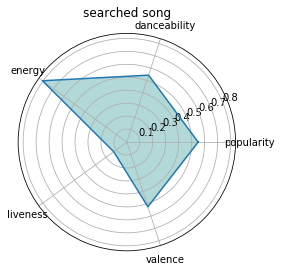

In [7]:
#Names of the features into list
Attributes = list(dj_norm)
AttNo = len(Attributes)

#select row from ID and return as list of values
values = dj_norm.iloc[65621].tolist()
values += values [:1]

#Set equals spacing for each feature
angles = [n / float(AttNo) * 2 * pi for n in range(AttNo)]
angles += angles [:1]

##create radar visual
ax = plt.subplot(111, polar=True)
#Add the attribute labels to our axes
plt.xticks(angles[:-1],Attributes)

#Plot the line around the outside of the filled area, using the angles and values calculated before
ax.plot(angles, values)

#Fill in the area plotted in the last line
ax.fill(angles, values,  'teal', alpha=0.3)

#Give the plot a title and show it
ax.set_title("searched song")
plt.show()

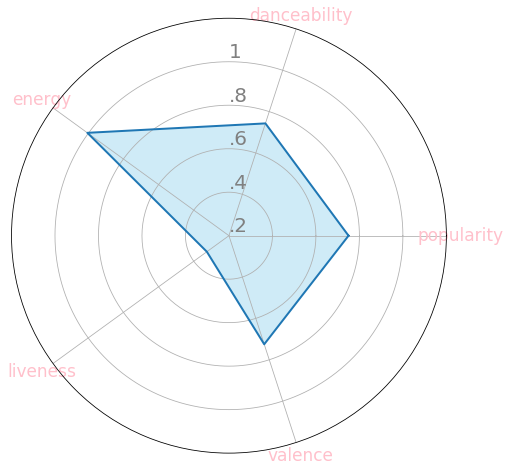

In [8]:
categories = list(dj_norm)
values = dj_norm.iloc[65621].tolist()
values += values[:1] # repeat the first value to close the circular graph

angles = [n / float(len(categories)) * 2 * pi for n in range(len(categories))]
angles += angles[:1]

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8),
                       subplot_kw=dict(polar=True))

plt.xticks(angles[:-1], categories, color='pink', size=17)
plt.yticks(np.arange(0, 1, .2), ['.2', '.4', '.6', '.8', '1'],
           color='grey', size=20)
plt.ylim(0,1)
ax.set_rlabel_position(90)
 
ax.plot(angles, values, linewidth=2, linestyle='solid')
ax.fill(angles, values, 'skyblue', alpha=0.4)

plt.show()

In [9]:
np.arange(0, 1.1,.1)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [10]:
stats =['0','.1','.2','.3','.4','.5','.6','.7','.8','.9','1']

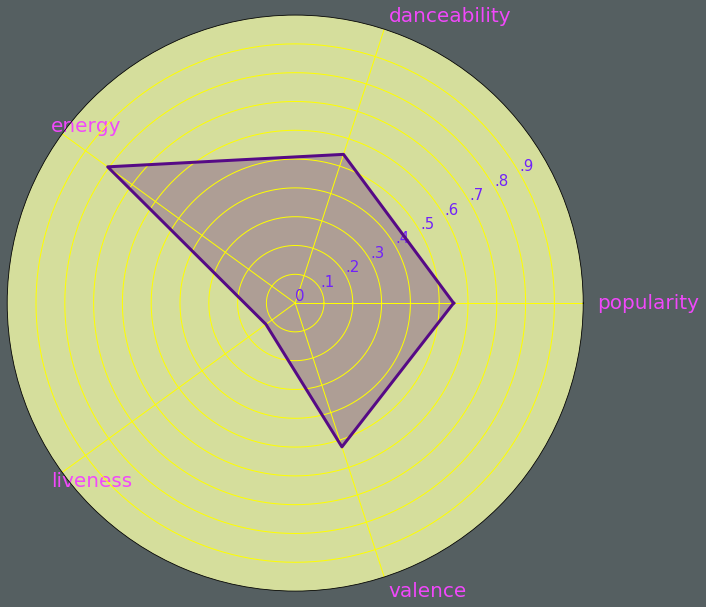

In [13]:
#list of feature from data
categories = list(dj_norm)

#searched song index values
values = dj_norm.iloc[65621].tolist()
values += values[:1] # repeat the first value to close the circular graph

#eqation for equal spacing 
angles = [n / float(len(categories)) * 2 * pi for n in range(len(categories))]
angles += angles[:1]

#customize radial lines
plt.rc('grid', color='yellow', linewidth=1, linestyle='-')

#create figure 
#facecolor changes background color
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8),
                       subplot_kw=dict(polar=True),facecolor='#555f61')

#customize radar facecolor
ax = fig.add_axes([0.0, 0.0, 1.0, 1.0],projection='polar', facecolor='#d5de9c')

# customize feature name
plt.xticks(angles[:-1], categories, size=20, color='#f148fb')
for label,rot in zip(ax.get_xticklabels(),angles[:-1]):
    label.set_rotation(rot*180./np.pi)
    label.set_horizontalalignment("left")
    label.set_rotation_mode("anchor")

#customize range numbers
plt.yticks(np.arange(0, 1, .1), stats, color='#7122FA', size=15)
#set range limits
plt.ylim(0,1)
#degree position of range
ax.set_rlabel_position(30)

#data border customization
ax.plot(angles, values, linewidth=3, linestyle='solid', color='#560a86')
#data inner border customization, Alpha adjuts opacity
ax.fill(angles, values, '#560a86', alpha=0.3)

plt.show()

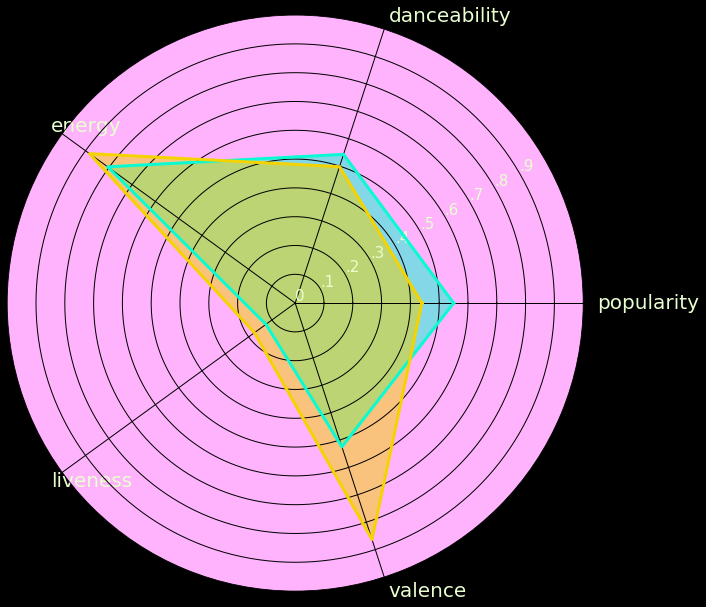

In [66]:
#list of feature from data
categories = list(dj_norm)

#searched song index values
values = dj_norm.iloc[65621].tolist()
values += values[:1] # repeat the first value to close the circular graph
#predicted song index values
values2 = dj_norm.iloc[65622].tolist()
values2 += values2 [:1]

#eqation for equal spacing (both tracks)
angles = [n / float(len(categories)) * 2 * pi for n in range(len(categories))]
angles += angles[:1]
angles2 = [n / float(len(categories)) * 2 * pi for n in range(len(categories))]
angles2 += angles[:1]

#customize radial lines
plt.rc('grid', color='black', linewidth=1, linestyle='-')

#create figure 
#facecolor changes background color
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8),
                       subplot_kw=dict(polar=True),facecolor='black')

#customize radar facecolor
#for x in range(n+1):
    #ax.axvline(x, color=colorFader(c1,c2,x/n), linewidth=4, alpha = .01)
ax = fig.add_axes([0.0, 0.0, 1.0, 1.0],projection='polar', facecolor='#Ffb3fd')

# customize feature name
plt.xticks(angles[:-1], categories, size=20, color='#EAFFD0')
for label,rot in zip(ax.get_xticklabels(),angles[:-1]):
    label.set_rotation(rot*180./np.pi)
    label.set_horizontalalignment("left")
    label.set_rotation_mode("anchor")

#customize range numbers
plt.yticks(np.arange(0, 1, .1), stats, color='#EAFFD0', size=15,)
#set range limits
plt.ylim(0,1)
#degree position of range
ax.set_rlabel_position(30)

#data border customization
ax.plot(angles, values, linewidth=3, linestyle='solid', color='#09fbd3')
#data inner border customization, Alpha adjuts opacity
ax.fill(angles, values, '#09fbd3', alpha=0.5)

ax.plot(angles2,values2,linewidth=3, linestyle='solid', color='#F5d300')
ax.fill(angles2, values2, '#F5d300', alpha=.5)

plt.show()

In [43]:
import matplotlib as mpl
def colorFader(c1,c2,mix=0): #fade (linear interpolate) from color c1 (at mix=0) to c2 (mix=1)
    c1=np.array(mpl.colors.to_rgb(c1))
    c2=np.array(mpl.colors.to_rgb(c2))
    return mpl.colors.to_hex((1-mix)*c1 + mix*c2)

c1='#7ad7f0' #blue
c2='#6a359c' #green
n=500